Populating the interactive namespace from numpy and matplotlib


/home/borgers/projects/notebook-mavlink/env/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


BAT {TimeUS : 319046014, Volt : 16.240467071533203, VoltR : 16.277870178222656, Curr : 0.11311523616313934, CurrTot : 17.429738998413086, EnrgTot : 0.28347864747047424, Temp : 0.0, Res : 0.3306625187397003}


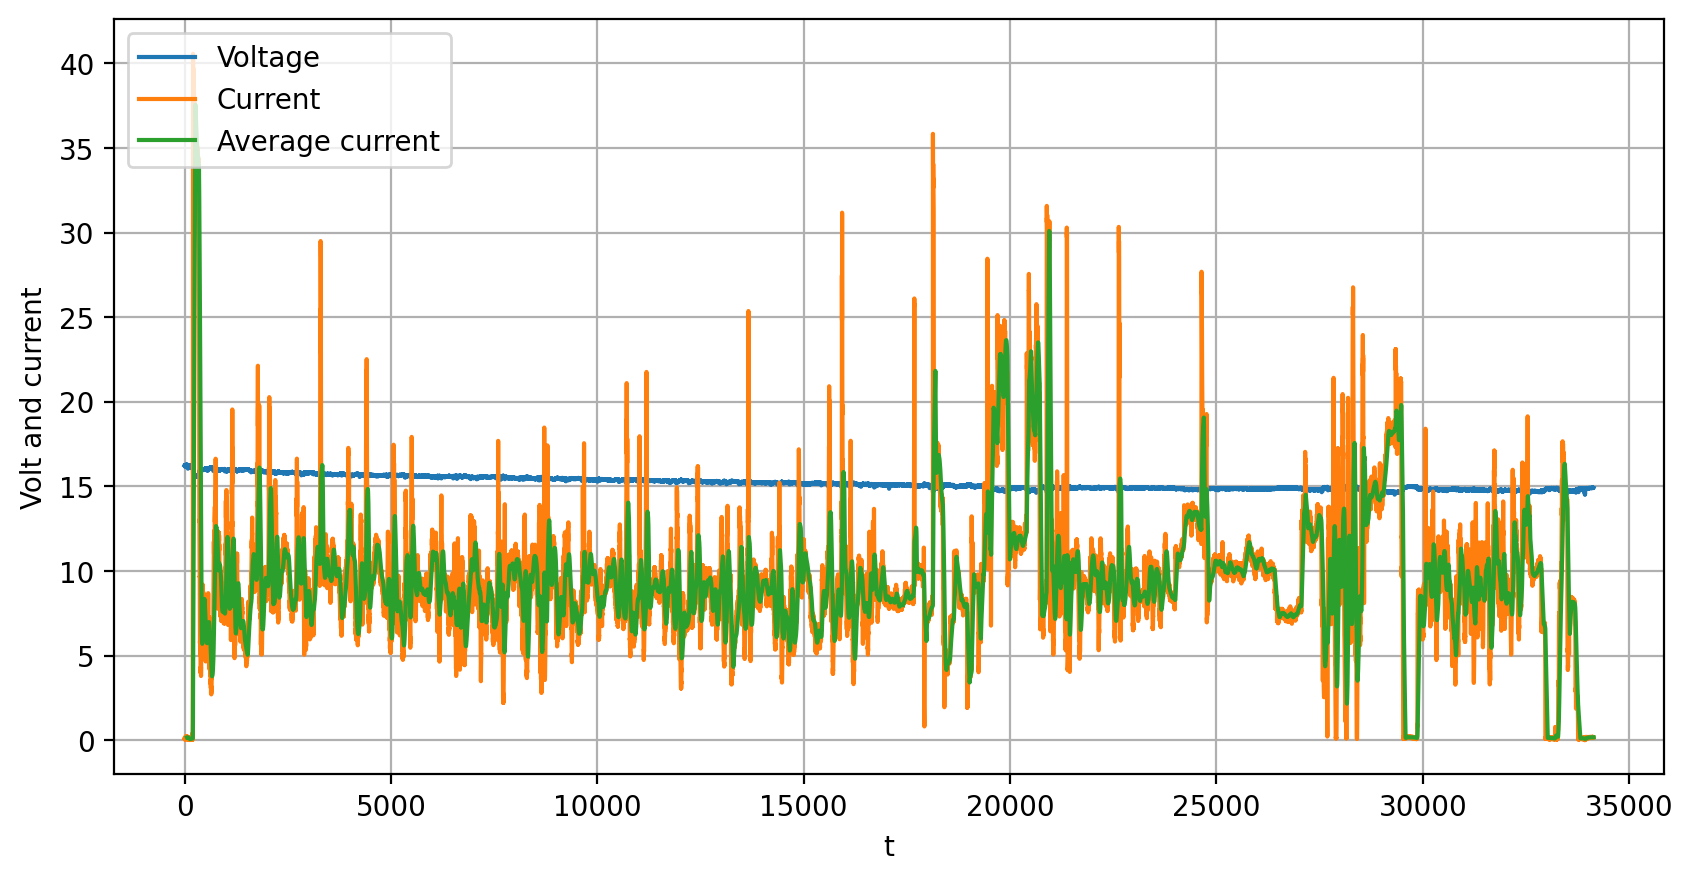

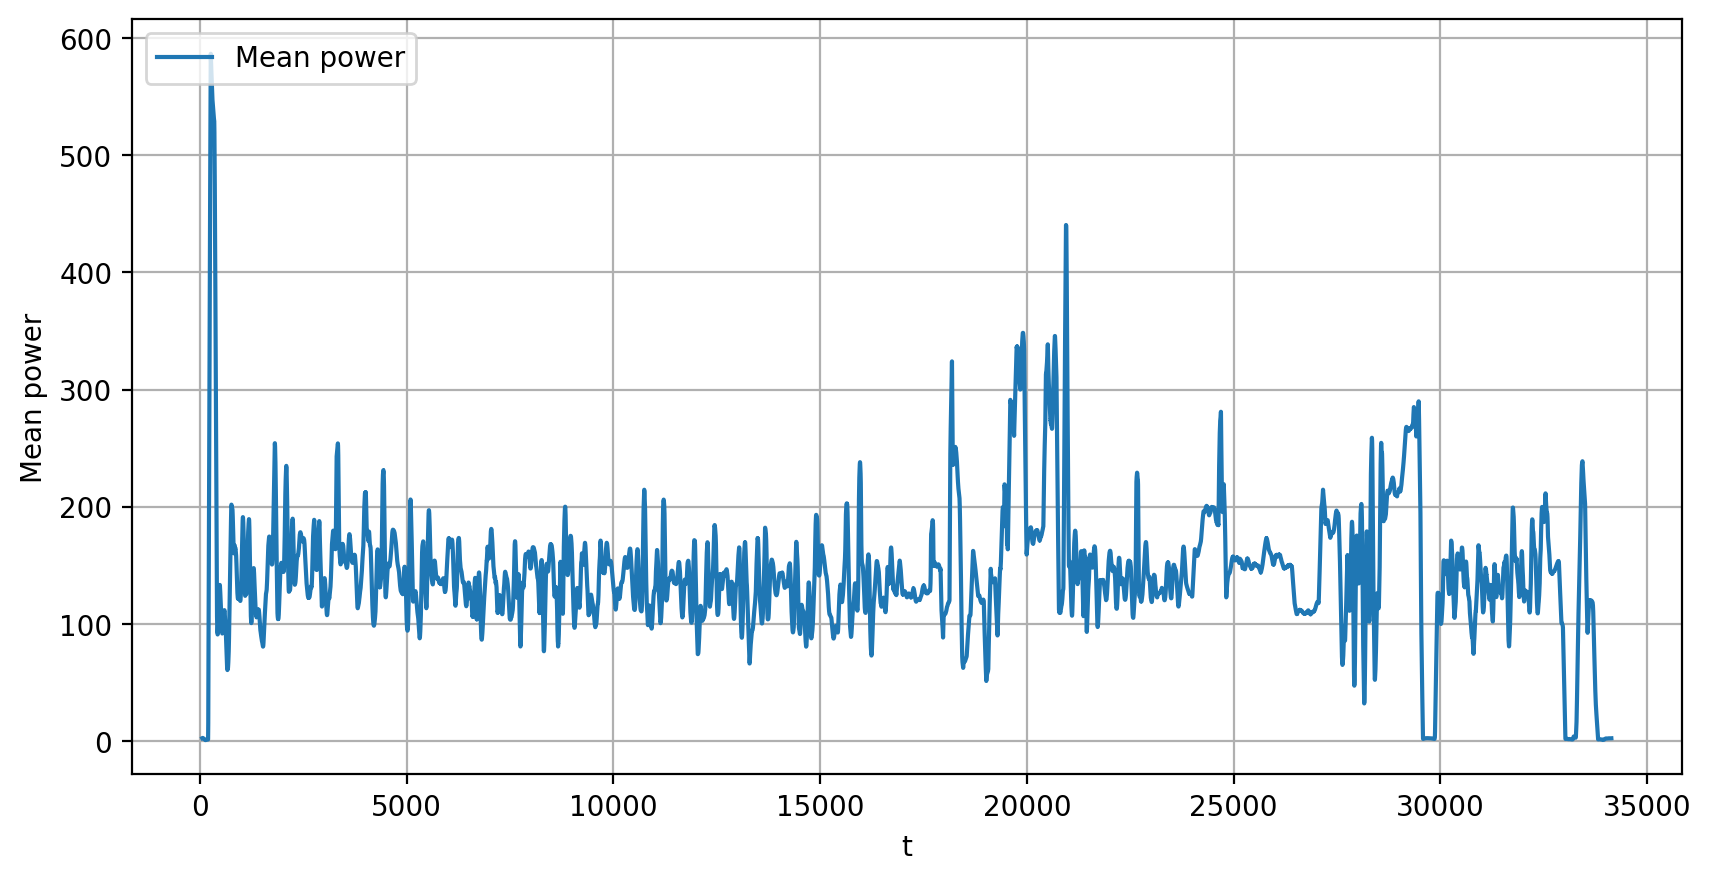

In [14]:
%matplotlib notebook
%pylab inline

import matplotlib.pylab as plt

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [10, 5]


import numpy as np
import pandas as pd

from pymavlink import mavutil

connection = mavutil.mavlink_connection("./dyvt.bin")

messages = []

while message := connection.recv_msg():
        messages.append(message)
                                                                                                                                                                         

battery_messages = list(filter(lambda message: message.get_type() == "BAT", messages))
print(battery_messages[0])

volts = list(map(lambda message: message.Volt, battery_messages))
volts_mean = pd.Series(volts).rolling(window=60).mean()
currents = list(map(lambda message: message.Curr, battery_messages))
currents_mean = pd.Series(currents).rolling(window=60).mean()

power_mean= volts_mean * currents_mean

plot(range(0, len(volts)), volts, label='Voltage')
plot(range(0, len(currents)), currents, label='Current')
#plot(range(0, len(volts_mean)), volts_mean, label='Average voltage')
plot(range(0, len(currents_mean)), currents_mean, label='Average current')

grid()

xlabel("t")
ylabel("Volt and current")
legend(loc='upper left')

figure()

plot(range(0, len(power_mean)), power_mean, label='Mean power')

grid()

xlabel("t")
ylabel("Mean power")
legend(loc='upper left')